In [86]:
import pybamm
import numpy as np


## Create current profile

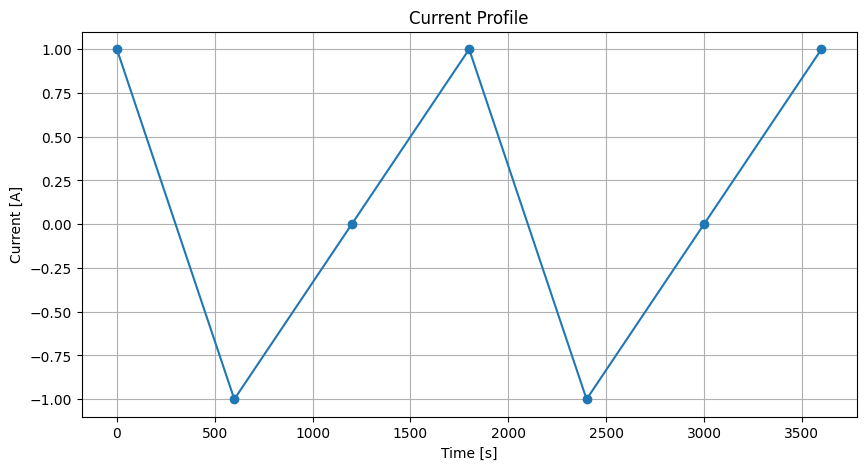

In [87]:

def create_simple_current_profile(duration=3600, step=600, current_values=[1, -1, 0]):
    """
    Create a simple current profile for testing.

    Parameters:
        duration: int
            Total duration of the profile in seconds.
        step: int
            Duration of each current step in seconds.
        current_values: list
            List of current values (A) for each step.

    Returns:
        np.ndarray: Array of (time [s], current [A]) pairs.
    """
    
    times = np.arange(0, duration + step, step)
    currents = np.resize(current_values, times.shape)
    profile = np.column_stack((times, currents))


    return profile

def plot_current_profile(current_profile):
    """
    Plot a current profile.

    Parameters:
        current_profile: np.ndarray or list of tuples
            Array or list of (time [s], current [A]) pairs.
    """
    import matplotlib.pyplot as plt

    # Ensure current_profile is a numpy array
    current_profile = np.array(current_profile)
    times = current_profile[:, 0]
    currents = current_profile[:, 1]

    plt.figure(figsize=(10, 5))
    plt.plot(times, currents, marker='o')
    plt.title("Current Profile")
    plt.xlabel("Time [s]")
    plt.ylabel("Current [A]")
    plt.grid()
    plt.show()

current_profile = create_simple_current_profile()

plot_current_profile(current_profile)


## Run Battery Model --> Create Voltage Response

In [88]:
model = pybamm.lithium_ion.DFN()
# import drive cycle from file
#drive_cycle[:, 1] = drive_cycle[:, 1]
# load parameter values
param = pybamm.ParameterValues("Chen2020")
current_interpolant = pybamm.Interpolant(current_profile[:, 0], current_profile[:, 1], pybamm.t)
param["Current function [A]"] = current_interpolant
# set up simulation
solver = pybamm.CasadiSolver(mode="fast")
simulation = pybamm.Simulation(model, parameter_values=param, solver=solver)
# simulate
simulation.solve()
# plot
simulation.plot()

interactive(children=(FloatSlider(value=0.0, description='t', max=1.0, step=0.01), Output()), _dom_classes=('w…